# Funnel Analysis Goal

The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that lead to conversion is called 'funnel'.

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.


Challenge Description

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

From the home page, the user can perform a search and land on the search page. From the search page, if the user clicks on a product, she will get to the payment page,
where she is asked to provide payment information in order to buy that product.

If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the 􏱎olu􏱏e o􏱐 sales and, especially, o􏱐 sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Specifically, she is interested in :

A full picture of funnel conversion rate for both desktop and mobile
Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve

In [113]:
import numpy as np

In [35]:
# read data
import pandas as pd
homepage = pd.read_csv('./data/home_page_table.csv')
payment = pd.read_csv('./data/payment_confirmation_table.csv')
confirm = pd.read_csv('./data/payment_page_table.csv')
search = pd.read_csv('./data/search_page_table.csv')
user = pd.read_csv('./data/user_table.csv')

In [36]:
# dimension of the dataset
print(homepage.shape)
print(payment.shape)
print(confirm.shape)
print(search.shape)
print(user.shape)

(90400, 2)
(452, 2)
(6030, 2)
(45200, 2)
(90400, 4)


In [37]:
# every user_id is unique
print(len(set(homepage.user_id)))
print(len(set(payment.user_id)))
print(len(set(confirm.user_id)))
print(len(set(search.user_id)))
print(len(set(user.user_id)))

90400
452
6030
45200
90400


([<matplotlib.axis.XTick at 0x121557860>,
 <a list of 4 Text xticklabel objects>)

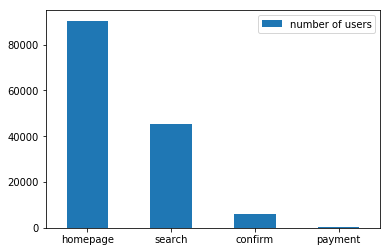

In [127]:
# EDA - numbers of users in different pages
import matplotlib.pyplot as plt
a = pd.DataFrame([len(set(homepage.user_id)),len(set(search.user_id)),
                  len(set(confirm.user_id)), len(set(payment.user_id))],
                columns = ['number of users'])
a.plot.bar()
plt.xticks([0,1,2,3], ['homepage','search','confirm','payment'], rotation=0)

In [39]:
# Merge each page dataset to user dataset
homepage = pd.merge(homepage, user, on = 'user_id')
payment = pd.merge(payment, user, on = 'user_id')
confirm = pd.merge(confirm, user, on = 'user_id')
search = pd.merge(search, user, on = 'user_id')

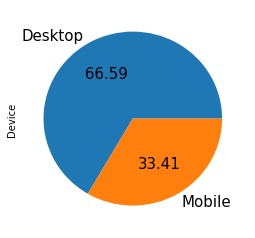

In [60]:
# Kind of Device
user.groupby('device').count()

series = pd.Series([user.user_id[user['device'] == 'Desktop'].count(),
                    user.user_id[user['device'] == 'Mobile'].count()], 
                    index=['Desktop','Mobile'], name='Device')
series.plot.pie(figsize=(4, 4), autopct='%.2f', fontsize=15)

In [49]:
homepage.head()

,user_id,page,date,device,sex
0,313593,home_page,2015-02-26,Desktop,Female
1,468315,home_page,2015-02-21,Desktop,Male
2,264005,home_page,2015-03-25,Desktop,Female
3,290784,home_page,2015-03-14,Desktop,Male
4,639104,home_page,2015-01-03,Desktop,Female


([<matplotlib.axis.XTick at 0x1218f8128>,
 <a list of 4 Text xticklabel objects>)

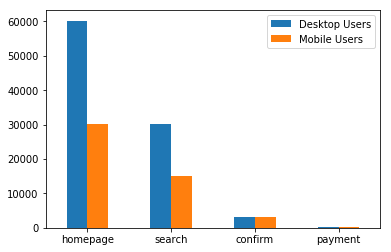

In [128]:
# Kind of Device Among Different Pages
a = pd.DataFrame([len(set(homepage[homepage['device']=='Desktop'].user_id)),
                  len(set(search[search['device']=='Desktop'].user_id)),
                  len(set(confirm[confirm['device']=='Desktop'].user_id)), 
                  len(set(payment[payment['device']=='Desktop'].user_id))],
                columns = ['number of users'])
b = pd.DataFrame([len(set(homepage[homepage['device']=='Mobile'].user_id)),
                  len(set(search[search['device']=='Mobile'].user_id)),
                  len(set(confirm[confirm['device']=='Mobile'].user_id)), 
                  len(set(payment[payment['device']=='Mobile'].user_id))],
                columns = ['number of users'])
c = pd.concat([a,b], axis=1)
c.columns = ['Desktop Users', 'Mobile Users']

c.plot.bar()
plt.xticks([0,1,2,3], ['homepage','search','confirm','payment'], rotation=0)

([<matplotlib.axis.XTick at 0x11f088780>,
 <a list of 2 Text xticklabel objects>)

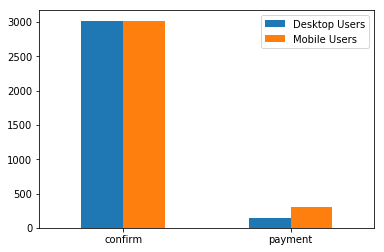

In [129]:
# look closer to payment and confirm
c[2:].plot.bar()
plt.xticks([0,1], ['confirm','payment'], rotation=0)

Overall, we have more desktop users (67%) and fewer mobile users (33%). This trend is consistent in homepage and search page such that desktop users are significantly higher than mobile users in these page categories. However, this trend do agree in payment and confirmation page where the number from both devices are even for payment page and the number of mobile users even exceed that of desktop users.

This implies the potential bugs / design flaw / inconvenience within the desktop payment page preventing customer from other.

([<matplotlib.axis.XTick at 0x11f64b6d8>,
 <a list of 4 Text xticklabel objects>)

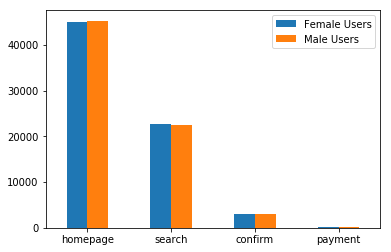

In [130]:
# Gender Among Different Pages
a = pd.DataFrame([len(set(homepage[homepage['sex']=='Female'].user_id)),
                  len(set(search[search['sex']=='Female'].user_id)),
                  len(set(confirm[confirm['sex']=='Female'].user_id)), 
                  len(set(payment[payment['sex']=='Female'].user_id))],
                columns = ['number of users'])
b = pd.DataFrame([len(set(homepage[homepage['sex']=='Male'].user_id)),
                  len(set(search[search['sex']=='Male'].user_id)),
                  len(set(confirm[confirm['sex']=='Male'].user_id)), 
                  len(set(payment[payment['sex']=='Male'].user_id))],
                columns = ['number of users'])
c = pd.concat([a,b], axis=1)
c.columns = ['Female Users', 'Male Users']

c.plot.bar()
plt.xticks([0,1,2,3], ['homepage','search','confirm','payment'], rotation=0)

We see gender doesn't not play any significant rule in amount of users.

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


([<matplotlib.axis.XTick at 0x11f6bbda0>,
 <a list of 5 Text xticklabel objects>)

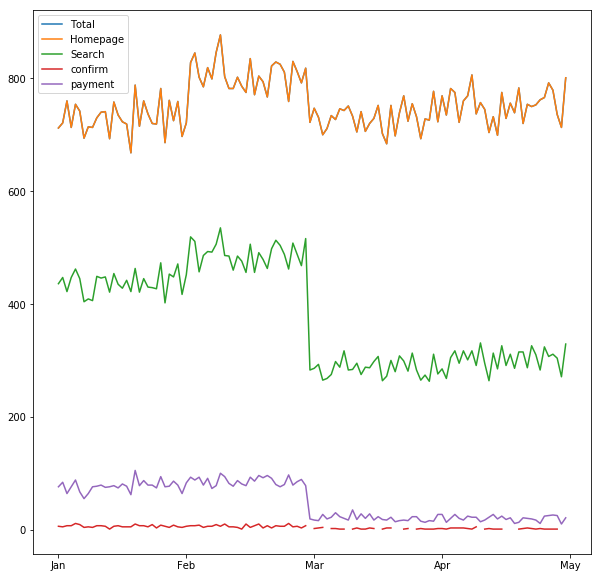

In [131]:
# Time Trend - Total
a = pd.DataFrame(user.groupby('date').count()['user_id'])
b = pd.DataFrame(homepage.groupby('date').count()['user_id'])
c = pd.DataFrame(search.groupby('date').count()['user_id'])
d = pd.DataFrame(payment.groupby('date').count()['user_id'])
e = pd.DataFrame(confirm.groupby('date').count()['user_id'])

f = pd.concat([a,b,c,d,e], axis=1)
f.columns = ['Total','Homepage','Search','confirm','payment']

f.plot(kind = 'line', figsize = (10,10))
#plt.xticks(list(range(0, len(a.index))), a.index)
plt.xticks([0,30,60,90,120], ['Jan','Feb','Mar','Apr','May'])

There is a significant drop in number of user in the beginning of march. 

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


([<matplotlib.axis.XTick at 0x11d53e160>,
 <a list of 5 Text xticklabel objects>)

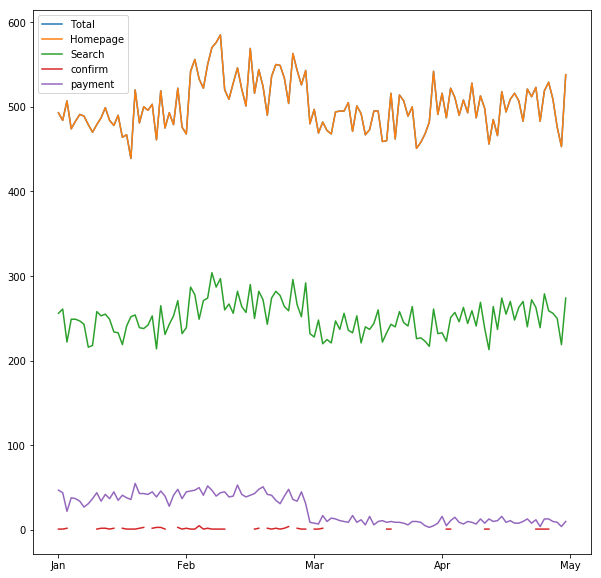

In [132]:
# Time Trend - Desktop
a = pd.DataFrame(user[user['device'] == 'Desktop'].groupby('date').count()['user_id'])
b = pd.DataFrame(homepage[homepage['device'] == 'Desktop'].groupby('date').count()['user_id'])
c = pd.DataFrame(search[search['device'] == 'Desktop'].groupby('date').count()['user_id'])
d = pd.DataFrame(payment[payment['device'] == 'Desktop'][user['device'] == 'Desktop'].groupby('date').count()['user_id'])
e = pd.DataFrame(confirm[confirm['device'] == 'Desktop'].groupby('date').count()['user_id'])

f = pd.concat([a,b,c,d,e], axis=1)
f.columns = ['Total','Homepage','Search','confirm','payment']

f.plot(kind = 'line', figsize = (10,10))
#plt.xticks(list(range(0, len(a.index))), a.index)
plt.xticks([0,30,60,90,120], ['Jan','Feb','Mar','Apr','May'])

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


([<matplotlib.axis.XTick at 0x1220462b0>,
 <a list of 5 Text xticklabel objects>)

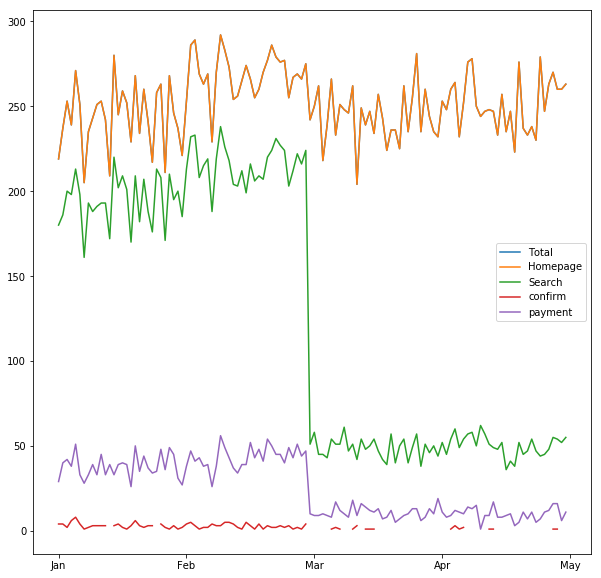

In [133]:
# Time Trend - Mobile
a = pd.DataFrame(user[user['device'] == 'Mobile'].groupby('date').count()['user_id'])
b = pd.DataFrame(homepage[homepage['device'] == 'Mobile'].groupby('date').count()['user_id'])
c = pd.DataFrame(search[search['device'] == 'Mobile'].groupby('date').count()['user_id'])
d = pd.DataFrame(payment[payment['device'] == 'Mobile'][user['device'] == 'Desktop'].groupby('date').count()['user_id'])
e = pd.DataFrame(confirm[confirm['device'] == 'Mobile'].groupby('date').count()['user_id'])

f = pd.concat([a,b,c,d,e], axis=1)
#f = f.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=0)
f.columns = ['Total','Homepage','Search','confirm','payment']

f.plot(kind = 'line', figsize = (10,10))
#plt.xticks(list(range(0, len(a.index))), a.index)
plt.xticks([0,30,60,90,120], ['Jan','Feb','Mar','Apr','May'])

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


([<matplotlib.axis.XTick at 0x1222e9278>,
 <a list of 5 Text xticklabel objects>)

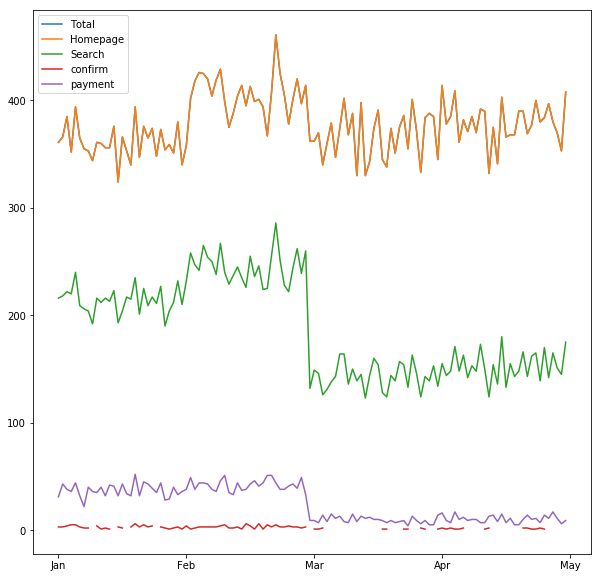

In [134]:
# Time Trend - Male
a = pd.DataFrame(user[user['sex']=='Male'].groupby('date').count()['user_id'])
b = pd.DataFrame(homepage[homepage['sex']=='Male'].groupby('date').count()['user_id'])
c = pd.DataFrame(search[search['sex']=='Male'].groupby('date').count()['user_id'])
d = pd.DataFrame(payment[payment['sex']=='Male'].groupby('date').count()['user_id'])
e = pd.DataFrame(confirm[confirm['sex']=='Male'].groupby('date').count()['user_id'])

f = pd.concat([a,b,c,d,e], axis=1)
f.columns = ['Total','Homepage','Search','confirm','payment']

f.plot(kind = 'line', figsize = (10,10))
#plt.xticks(list(range(0, len(a.index))), a.index)
plt.xticks([0,30,60,90,120], ['Jan','Feb','Mar','Apr','May'])

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


([<matplotlib.axis.XTick at 0x11f2119e8>,
 <a list of 5 Text xticklabel objects>)

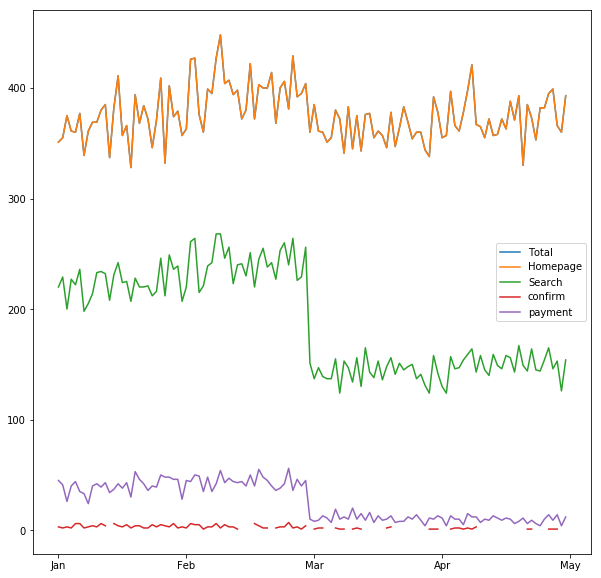

In [135]:
# Time Trend - Female
a = pd.DataFrame(user[user['sex']=='Female'].groupby('date').count()['user_id'])
b = pd.DataFrame(homepage[homepage['sex']=='Female'].groupby('date').count()['user_id'])
c = pd.DataFrame(search[search['sex']=='Female'].groupby('date').count()['user_id'])
d = pd.DataFrame(payment[payment['sex']=='Female'].groupby('date').count()['user_id'])
e = pd.DataFrame(confirm[confirm['sex']=='Female'].groupby('date').count()['user_id'])

f = pd.concat([a,b,c,d,e], axis=1)
f.columns = ['Total','Homepage','Search','confirm','payment']

f.plot(kind = 'line', figsize = (10,10))
#plt.xticks(list(range(0, len(a.index))), a.index)
plt.xticks([0,30,60,90,120], ['Jan','Feb','Mar','Apr','May'])

Both male and female users reflect in decrease of users in early march, so gender doesn't play a role here.

# Conclusion
There exists a decreasing trend in number of users from home page to confirmation page, which is reasonable as not all the users would want to make a purchase.

Desktop users contributed about 66% of the total traffic while mobile users contributed about 33% of the total traffic. This trend remains true for home page and search page where the number of desktop users are significantly higher the number of mobile users. However, when it comes to confirmation page, the number of desktop and mobile users become very close. In addition, in the final payment page, the number of mobile users actually exceeds the number of desktop users. Hence, we suspect there could be potential problem in the linkage between desktop search page and desktop payment page, such that users may not like the web design, the loading time of payment page can be too long, users cannot find the right button to move on to payment page, or users are more bonded to mobile payment method.

Gender doesn't play a significant role in affecting the number of users.

To understand a deeper situtation on our e-commerce platform, the number of users per day is analyzed. It seems like there is a significant drop in number of users in early march in Search, Confirmation, and Payment. In fact, before March, the number of users in Search page is slightly fewer than that of Home page. However, after March, the gap significantly increased. Therefore, the issue may appear in the Search page such that there could be something wrong with the linkage between homepage and search page. In addition, when we analyze the trend between time and number of users separately for mobile and desktop users, we realize that the drop of users between home page and search page is much more significant in mobile users, which suggests the problem may be more intensive in our mobile application.

Additional analysis can only be done in additional data is provided. We would conclude that there is something wrong with our online e-commerce platform in early March and the issue is still remained. The issue is more intensive in mobile application resulting in a significant drop in numbers of users between homepage users and search page users.